### 1. Exploração inicial dos dados

Este notebook (01-exploracao-inicial) foca no entendimento dos dados, análise descritiva inicial, identificação de nulo, ouliners entre outros

In [1]:
# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
caminho = '../data/raw/dados_brutos.csv'
df_psico = pd.read_csv(caminho)

NameError: name 'pd' is not defined

In [31]:
df_psico.columns

Index(['ano', 'mes', 'sigla_uf', 'id_estabelecimento_cnes',
       'id_estabelecimento_cnes_familia', 'id_procedimento_ambulatorial',
       'id_servico_especializado', 'id_classificacao_servico',
       'data_inicio_atendimento', 'data_termino_atendimento',
       'permanencia_atendimento', 'motivo_saida_permanencia',
       'data_motivo_saida_permanencia', 'ano_processamento',
       'mes_processamento', 'ano_atendimento', 'mes_atendimento',
       'data_nascimento_paciente', 'origem_paciente', 'nacionalidade_paciente',
       'tipo_idade', 'idade_paciente', 'sexo_paciente', 'raca_cor_paciente',
       'etnia_paciente', 'carater_atendimento', 'cid_principal_categoria',
       'cid_principal_subcategoria', 'cid_causas_associadas_categoria',
       'cid_causas_associadas_subcategoria', 'tipo_droga', 'destino_paciente',
       'local_realizacao_atendimento', 'indicador_situacao_rua',
       'indicador_estrategia_familia', 'quantidade_produzida_procedimento',
       'quantidade_aprovada_

#### 1.1 Junção com dicionários

Os dados originais estão em códigos (id, cid). Nessa etapa carregados os dicionários e os unimos com a tabela principal

In [10]:
dic_sid = pd.read_csv('../data/dicionarios/br_bd_diretorios_brasil_cid_10.csv')
dic_municipio = pd.read_csv('../data/dicionarios/br_bd_diretorios_brasil_municipio.csv')
dic_geral = pd.read_csv('../data/dicionarios/br_ms_sia_dicionario.csv')

In [13]:
print(dic_municipio.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_municipio               5571 non-null   int64  
 1   id_municipio_6             5571 non-null   int64  
 2   id_municipio_tse           5570 non-null   float64
 3   id_municipio_rf            5570 non-null   float64
 4   id_municipio_bcb           5570 non-null   float64
 5   nome                       5571 non-null   object 
 6   capital_uf                 5570 non-null   float64
 7   id_comarca                 5570 non-null   float64
 8   id_regiao_saude            5570 non-null   float64
 9   nome_regiao_saude          5570 non-null   object 
 10  id_regiao_imediata         5571 non-null   int64  
 11  nome_regiao_imediata       5571 non-null   object 
 12  id_regiao_intermediaria    5571 non-null   int64  
 13  nome_regiao_intermediaria  5571 non-null   objec

In [23]:
dic_nomes = dic_municipio.set_index('id_municipio')['nome']

# adiciona nome dos municípios de atendimento para a tabela inicial
df_psico['nome_municipio'] = df_psico['id_municipio'].map(dic_nomes)

# adiciona nome dos municípios de residencia dos pacientes para a tabela inicial
df_psico['nome_municipio_residencia'] = df_psico['id_municipio_residencia_paciente'].map(dic_nomes)


In [29]:
# remoção de colunas que não serão mais usadas
df_psico = df_psico.drop(columns=['id_municipio', 'id_municipio_residencia_paciente'])

In [28]:
dic_geral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_tabela           515 non-null    object
 1   nome_coluna         515 non-null    object
 2   chave               515 non-null    object
 3   cobertura_temporal  501 non-null    object
 4   valor               515 non-null    object
dtypes: object(5)
memory usage: 20.2+ KB


In [39]:
colunas_chave = ['nome_coluna', 'chave']
dic_geral = dic_geral.drop_duplicates(subset=colunas_chave, keep='first')

In [49]:
# adiciona a etnia dos pacientes
raca_cor = dic_geral[dic_geral['nome_coluna'] == 'raca_cor_paciente']
mapa = raca_cor.set_index('chave')['valor']
df_psico['raca_cor_paciente'] = df_psico['raca_cor_paciente'].astype(str).map(mapa)

# adiciona o tipo de droga
tipo_droga = dic_geral[dic_geral['nome_coluna'] == 'tipo_droga']
mapa = tipo_droga.set_index('chave')['valor']
df_psico['tipo_droga'] = df_psico['tipo_droga'].astype(str).map(mapa)

# outros traduções que possam ser importantes
origem = dic_geral[dic_geral['nome_coluna'] == 'origem_paciente']
mapa = origem.set_index('chave')['valor']
df_psico['origem_paciente'] = df_psico['origem_paciente'].astype(str).map(mapa)

carater = dic_geral[dic_geral['nome_coluna'] == 'carater_atendimento']
mapa = carater.set_index('chave')['valor']
df_psico['carater_atendimento'] = df_psico['carater_atendimento'].astype(str).map(mapa)

tipo_idade = dic_geral[dic_geral['nome_coluna'] == 'tipo_idade']
mapa = tipo_idade.set_index('chave')['valor']
df_psico['tipo_idade'] = df_psico['tipo_idade'].astype(str).map(mapa)

destino = dic_geral[dic_geral['nome_coluna'] == 'destino_paciente']
mapa = destino.set_index('chave')['valor']
df_psico['destino_paciente'] = df_psico['destino_paciente'].astype(str).map(mapa)

In [2]:
df_psico['tipo_idade'].head()

NameError: name 'df_psico' is not defined

eita

In [11]:
dic_sid.head()

,subcategoria,descricao_subcategoria,categoria,descricao_categoria,capitulo,descricao_capitulo,causa_violencia,causa_overdose,cid_datasus
0,A000,"Cólera devida a Vibrio cholerae 01, biótipo ch...",A00,Cólera,I,Algumas doenças infecciosas e parasitárias,0,0,0
1,A001,"Cólera devida a Vibrio cholerae 01, biótipo El...",A00,Cólera,I,Algumas doenças infecciosas e parasitárias,0,0,0
2,A009,Cólera não especificada,A00,Cólera,I,Algumas doenças infecciosas e parasitárias,0,0,0
3,A013,Febre paratifóide C,A01,Febres tifóide e paratifóide,I,Algumas doenças infecciosas e parasitárias,0,0,0
4,A010,Febre tifóide,A01,Febres tifóide e paratifóide,I,Algumas doenças infecciosas e parasitárias,0,0,0


In [26]:
df_psico['origem_paciente'].head()

0    2
1    2
2    2
3    2
4    2
Name: origem_paciente, dtype: int64

In [4]:
df.columns

Index(['ano', 'mes', 'sigla_uf', 'id_municipio', 'id_estabelecimento_cnes',
       'id_estabelecimento_cnes_familia', 'id_procedimento_ambulatorial',
       'id_servico_especializado', 'id_classificacao_servico',
       'data_inicio_atendimento', 'data_termino_atendimento',
       'permanencia_atendimento', 'motivo_saida_permanencia',
       'data_motivo_saida_permanencia', 'ano_processamento',
       'mes_processamento', 'ano_atendimento', 'mes_atendimento',
       'data_nascimento_paciente', 'id_municipio_residencia_paciente',
       'origem_paciente', 'nacionalidade_paciente', 'tipo_idade',
       'idade_paciente', 'sexo_paciente', 'raca_cor_paciente',
       'etnia_paciente', 'carater_atendimento', 'cid_principal_categoria',
       'cid_principal_subcategoria', 'cid_causas_associadas_categoria',
       'cid_causas_associadas_subcategoria', 'tipo_droga', 'destino_paciente',
       'local_realizacao_atendimento', 'indicador_situacao_rua',
       'indicador_estrategia_familia', 'quant

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717639 entries, 0 to 3717638
Data columns (total 41 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   ano                                 int64  
 1   mes                                 int64  
 2   sigla_uf                            object 
 3   id_municipio                        int64  
 4   id_estabelecimento_cnes             int64  
 5   id_estabelecimento_cnes_familia     object 
 6   id_procedimento_ambulatorial        int64  
 7   id_servico_especializado            int64  
 8   id_classificacao_servico            int64  
 9   data_inicio_atendimento             object 
 10  data_termino_atendimento            object 
 11  permanencia_atendimento             object 
 12  motivo_saida_permanencia            int64  
 13  data_motivo_saida_permanencia       object 
 14  ano_processamento                   int64  
 15  mes_processamento                   int64  
 16  

In [ ]:
df.shape # total de linhas e colunas do dataframe

(3717639, 41)

1.1 Análise exploratória inicial dos dados

In [ ]:
df.describe()

,ano,mes,id_municipio,id_estabelecimento_cnes,id_procedimento_ambulatorial,id_servico_especializado,id_classificacao_servico,motivo_saida_permanencia,ano_processamento,mes_processamento,...,idade_paciente,raca_cor_paciente,carater_atendimento,destino_paciente,indicador_situacao_rua,indicador_estrategia_familia,quantidade_produzida_procedimento,quantidade_aprovada_procedimento,quantidade_atendimentos,quantidade_pacientes
count,3.717639e+06,3.717639e+06,3.717639e+06,3.717639e+06,3.717639e+06,3717639.0,3.717639e+06,3.717639e+06,3.717639e+06,3.717639e+06,...,3.717639e+06,3.717639e+06,3717639.0,3.717639e+06,0.0,0.0,3.717639e+06,3.717639e+06,3.717639e+06,3.717639e+06
mean,2.018998e+03,6.601455e+00,4.110603e+06,5.138690e+06,3.010802e+08,115.0,2.001114e+00,2.067708e+01,2.018998e+03,6.601455e+00,...,3.660830e+01,3.136785e+01,1.0,1.692278e-01,NaN,NaN,1.406897e+00,1.290870e+00,2.072520e-01,2.072520e-01
std,3.513079e+00,3.362249e+00,6.668110e+03,1.794789e+06,5.132860e+01,0.0,4.907224e-02,1.633918e+00,3.513079e+00,3.362249e+00,...,1.592243e+01,4.496812e+01,0.0,6.680074e-01,NaN,NaN,4.059276e+00,2.944596e+00,4.053377e-01,4.053377e-01
min,2.012000e+03,1.000000e+00,4.100400e+06,1.529600e+04,3.010800e+08,115.0,1.000000e+00,1.100000e+01,2.012000e+03,1.000000e+00,...,0.000000e+00,1.000000e+00,1.0,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.016000e+03,4.000000e+00,4.106902e+06,3.739112e+06,3.010802e+08,115.0,2.000000e+00,2.100000e+01,2.016000e+03,4.000000e+00,...,2.400000e+01,1.000000e+00,1.0,0.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,2.019000e+03,7.000000e+00,4.106902e+06,5.281210e+06,3.010802e+08,115.0,2.000000e+00,2.100000e+01,2.019000e+03,7.000000e+00,...,3.800000e+01,1.000000e+00,1.0,0.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,2.022000e+03,1.000000e+01,4.114302e+06,6.374352e+06,3.010802e+08,115.0,2.000000e+00,2.100000e+01,2.022000e+03,1.000000e+01,...,4.900000e+01,9.900000e+01,1.0,0.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,2.025000e+03,1.200000e+01,4.125506e+06,9.695915e+06,3.010804e+08,115.0,4.000000e+00,4.100000e+01,2.025000e+03,1.200000e+01,...,9.700000e+01,9.900000e+01,1.0,6.000000e+00,NaN,NaN,3.027000e+03,2.013000e+03,1.000000e+00,1.000000e+00


In [5]:
df.describe(include='object')

,sigla_uf,id_estabelecimento_cnes_familia,data_inicio_atendimento,data_termino_atendimento,permanencia_atendimento,data_motivo_saida_permanencia,data_nascimento_paciente,sexo_paciente,etnia_paciente,cid_principal_categoria,cid_principal_subcategoria,cid_causas_associadas_categoria,cid_causas_associadas_subcategoria,tipo_droga,local_realizacao_atendimento
count,3717639,3717639,770488,770488,3717639,54493,3717639,3717639,3717639,1296349,2421290,87134,228555,3717639,3717639
unique,1,342,3242,3584,32,2588,25409,2,6,154,495,129,350,9,2
top,PR,,2020-10-01,2019-10-31,,2015-07-31,2004-04-20,M,,F99,F102,F20,F989,,C
freq,3717639,2622698,6637,6931,2947151,325,2625,2084770,3717091,376663,482232,10707,62521,2708741,3669096


Na análise das variáveis qualitativos pode-se ver: 
* 

1.1 Verificação de dados nulos:

Valores 0.00 representa que o campo não contém dados nulos.

In [ ]:
df.isnull().mean().round(2)

ano                                   0.00
mes                                   0.00
sigla_uf                              0.00
id_municipio                          0.00
id_estabelecimento_cnes               0.00
id_estabelecimento_cnes_familia       0.00
id_procedimento_ambulatorial          0.00
id_servico_especializado              0.00
id_classificacao_servico              0.00
data_inicio_atendimento               0.79
data_termino_atendimento              0.79
permanencia_atendimento               0.00
motivo_saida_permanencia              0.00
data_motivo_saida_permanencia         0.99
ano_processamento                     0.00
mes_processamento                     0.00
ano_atendimento                       0.00
mes_atendimento                       0.00
data_nascimento_paciente              0.00
id_municipio_residencia_paciente      0.00
origem_paciente                       0.00
nacionalidade_paciente                0.00
tipo_idade                            0.00
idade_pacie

In [ ]:
df.head(10)

,ano,mes,sigla_uf,id_municipio,id_estabelecimento_cnes,id_estabelecimento_cnes_familia,id_procedimento_ambulatorial,id_servico_especializado,id_classificacao_servico,data_inicio_atendimento,...,cid_causas_associadas_subcategoria,tipo_droga,destino_paciente,local_realizacao_atendimento,indicador_situacao_rua,indicador_estrategia_familia,quantidade_produzida_procedimento,quantidade_aprovada_procedimento,quantidade_atendimentos,quantidade_pacientes
0,2012,11,PR,4106902,5322219,,301080046,115,1,2012-11-01,...,NaN,,0,C,NaN,NaN,1,1,1,1
1,2012,12,PR,4106902,5322219,,301080046,115,1,2012-12-01,...,NaN,,0,C,NaN,NaN,1,1,1,1
2,2012,11,PR,4106902,5322219,,301080046,115,1,2012-11-01,...,NaN,,0,C,NaN,NaN,1,1,1,1
3,2012,12,PR,4106902,5708621,0016829,301080046,115,1,2012-12-01,...,NaN,,0,T,NaN,NaN,1,1,1,1
4,2012,11,PR,4106902,5708621,0016829,301080046,115,1,2012-11-01,...,NaN,,0,C,NaN,NaN,1,1,1,1
5,2014,2,PR,4125506,3709256,,301080208,115,2,2014-02-07,...,NaN,,3,C,NaN,NaN,1,1,1,1
6,2014,2,PR,4113205,3904334,,301080240,115,2,2014-02-01,...,F172,,3,C,NaN,NaN,1,1,1,1
7,2014,2,PR,4119509,5075483,0018376,301080194,115,2,2014-02-27,...,NaN,,3,C,NaN,NaN,1,1,1,1
8,2014,2,PR,4119509,5075483,0018376,301080208,115,2,2014-02-01,...,NaN,,3,C,NaN,NaN,1,1,1,1
9,2014,2,PR,4119509,5075483,0018465,301080194,115,2,2014-02-14,...,NaN,,3,C,NaN,NaN,1,1,1,1


Criação de Boxplot com matplotlib

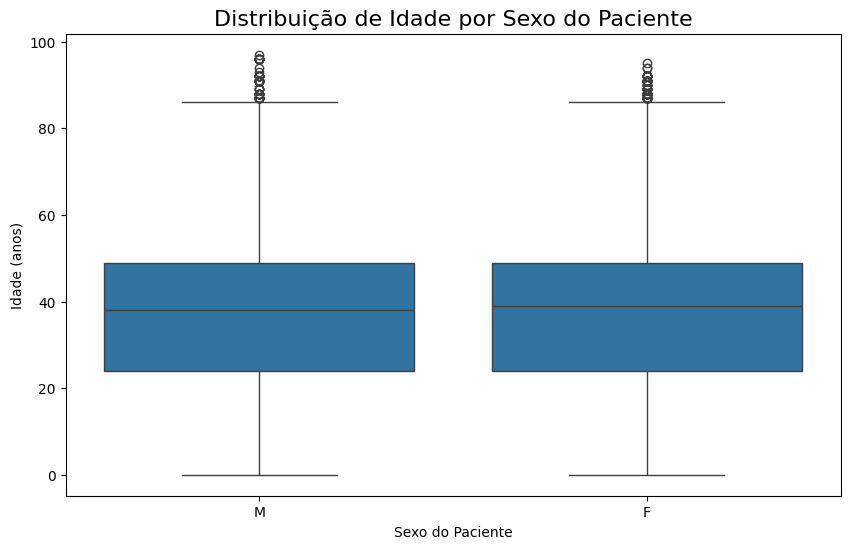

In [31]:
plt.figure(figsize=(10, 6)) 

sns.boxplot(
    x='sexo_paciente', 
    y='idade_paciente', 
    data=df
)

plt.title('Distribuição de Idade por Sexo do Paciente', fontsize=16)
plt.xlabel('Sexo do Paciente')
plt.ylabel('Idade (anos)')
plt.show()

In [9]:
df['permanencia_atendimento'].head(10)

0    30  
1    31  
2    30  
3    31  
4    30  
5    21  
6    25  
7    1   
8    10  
9    1   
Name: permanencia_atendimento, dtype: object

In [13]:
len(df['cid_principal_subcategoria'].unique())

496